# Bank Loan EDA Case Study

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In [1]:
# Importing some python libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# to see all the columns 
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

## Data Reading

In [2]:
inp0 = pd.read_csv('data/application_data.csv')
inp1 = pd.read_csv('data/previous_application.csv')

#### Application Data Analysis

In [3]:
inp0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
#understand dataframe
inp0.shape

(307511, 122)

In [5]:
#understand datafrmame information
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
#Check total number of missing values
inp0.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [7]:
#Get columns having missing values more than 50%
#50% may vary according to business need and understanding and how important that column data is for business 
pct_null = inp0.isnull().sum() / len(inp0)
missing_features = pct_null[pct_null > 0.50].index
print(missing_features)

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')


In [8]:
#Delete columns with missing values more than 50%
#inp0.drop(missing_features, axis=1, inplace=True)

In [9]:
#Check for columns having less than 13% of missong values to perform data correction
missing_features = pct_null[pct_null < 0.13].index
print(missing_features)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

In [10]:
#Impute missing values in different scenarios
#AMT_ANNUITY replacing with mean
#inp0['AMT_ANNUITY'].fillna(inp0.AMT_ANNUITY.mean(), inplace = True) 

#NAME_TYPE_SUITE with mode value
#inp0['NAME_TYPE_SUITE'].fillna(NAME_TYPE_SUITE.mode(), inplace = True)

#These columns missing values can be replaces with 0 

#inp0['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace = True)
#inp0['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace = True)
#inp0['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0, inplace = True)
#inp0['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0, inplace = True)

In [11]:
#check datatypes of each columns to correct them
inp0.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


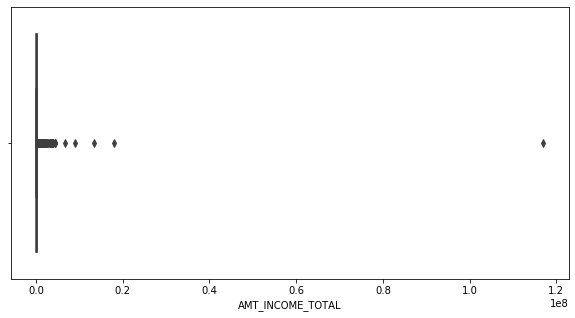

In [12]:
#Check for outliers for int values

plt.figure(figsize=(10,5))

sns.boxplot(inp0['AMT_INCOME_TOTAL'])
plt.show()

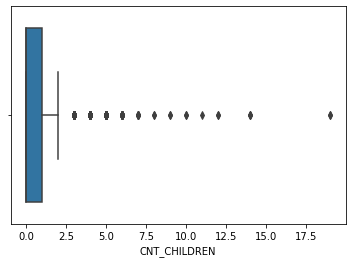

In [13]:
sns.boxplot(x=inp0['CNT_CHILDREN']) 
plt.show()
#outliers available more than 25

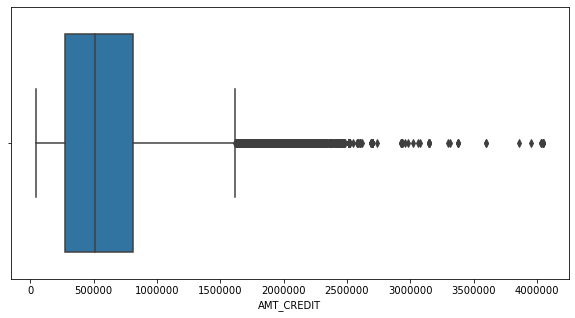

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x=inp0['AMT_CREDIT'])
plt.show()
#outliers available more than 1700000 amount

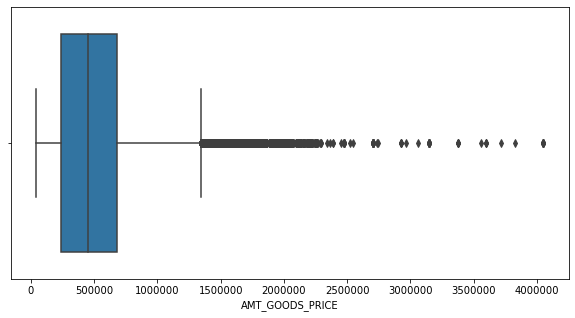

In [15]:
plt.figure(figsize=(10,5))

sns.boxplot(x=inp0['AMT_GOODS_PRICE'])
plt.show()
#outliers available more than 1700000 amount

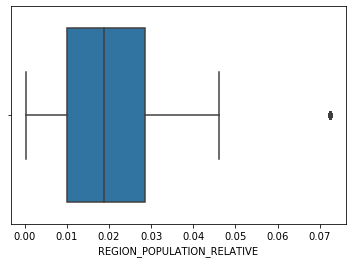

In [16]:
sns.boxplot(x=inp0['REGION_POPULATION_RELATIVE'])
plt.show()
#outliers available more than 0.05 value

In [17]:
#To identify categorical and continous column
inp0.nunique().sort_values(ascending=True)

LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_18                     2
FLAG_DOCUMENT_14                     2
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE                           2
FLAG_EMAIL                           2
FLAG_DOCUMENT_15                     2
FLAG_DOCUMENT_16                     2
FLAG_DOCUMENT_17                     2
EMERGENCYSTATE_MODE                  2
REG_CITY_NOT_WORK_CITY               2
REG_CITY_NOT_LIVE_CITY               2
REG_REGION_NOT_LIVE_REGION           2
FLAG_DOCUMENT_19                     2
REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_20                     2
FLAG_DOCUMENT_13                     2
TARGET                               2
NAME_CONTRACT_TYPE                   2
FLAG_DOCUMENT_2                      2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
FLAG_DOCUMENT_3          

In [18]:
# converting continous to categorical columns change datatype
#CODE_GENDER categorical column
#FLAG_OWN_CAR categorical column
#FLAG_OWN_REALTY categorical column

In [19]:
inp0['CODE_GENDER'] = inp0['CODE_GENDER'].astype('object')
inp0['FLAG_OWN_CAR'] = inp0['FLAG_OWN_CAR'].astype('object')
inp0['FLAG_OWN_REALTY'] = inp0['FLAG_OWN_REALTY'].astype('object')

In [20]:
inp0.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [21]:
#Binning process for annual income
inp0.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

### Convert Continous Columns into Bins for better data understanding

In [22]:
#Add new Column For Income Range
inp0['INCOME_RANGE']=pd.cut(inp0.AMT_INCOME_TOTAL,[25000,100000,200000,5000000],labels =['low','medinum','high'])

In [23]:
#Add New bin column for Age Group
inp0["age_group"]=pd.cut(inp0.DAYS_BIRTH.abs()/365, [0,30,40,50,60,9999], labels=["<30","30-40","40-50","50-60","60+"])

### Days Employed
This Column have 999 Years as value and some negative values
1. Convert Negative Value with Absolute Value
2. Replace Outside Range Values with Median
3. Add Colunmn to get Years from Days

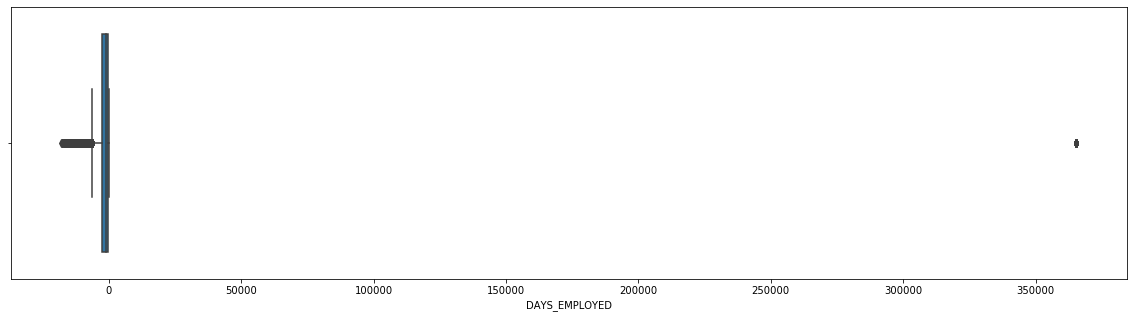

In [24]:
plt.figure(figsize=(20,5))
sns.boxplot(x=inp0['DAYS_EMPLOYED'])
plt.show()
#outlier's are available as some data have Max Experience as 999 years

In [25]:
#Convert data into Absolute Data as working days can not be negative
inp0['DAYS_EMPLOYED'] = inp0['DAYS_EMPLOYED'].abs()

In [26]:
#Get Median
inp0['DAYS_EMPLOYED'].median()

2219.0

In [27]:
#Replace Max Value with Median as max value is not valid value
inp0.loc[inp0['DAYS_EMPLOYED']>300000,'DAYS_EMPLOYED'] = 2219

In [28]:
#Add new Cloumn as WORKING_YEARS
inp0['WORKING_YEARS'] = inp0['DAYS_EMPLOYED']/365.25

In [29]:
inp0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461            637            -3648.0   
1                    0.003541      -16765           1188            -1186.0   
2                    0.010032      -19046            225            -4260.0   
3                    0.008019      -19005           3039            -9833.0   
4                    0.028663      -19932           3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

### Check Data Imbalance

In [30]:
#checking impabalnce percentage
100*inp0.INCOME_RANGE.value_counts(normalize = True)

medinum    50.697547
high       28.588060
low        20.714393
Name: INCOME_RANGE, dtype: float64

In [31]:
100*inp0.CODE_GENDER.value_counts(normalize = True)

F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

In [32]:
100*inp0.TARGET.value_counts(normalize = True)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [33]:
##Devide current dataset in two datasets with Target columns which represents client with payment difficulties
df_1=inp0[inp0['TARGET']==0]
df_2=inp0[inp0['TARGET']==1]

In [34]:
#Find correlation
df_1.corr()

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000     NaN     -0.000716   
TARGET                               NaN     NaN           NaN   
CNT_CHILDREN                   -0.000716     NaN      1.000000   
AMT_INCOME_TOTAL                0.001739     NaN      0.027397   
AMT_CREDIT                     -0.000342     NaN      0.003081   
AMT_ANNUITY                     0.000068     NaN      0.020905   
AMT_GOODS_PRICE                -0.000205     NaN     -0.000525   
REGION_POPULATION_RELATIVE      0.000360     NaN     -0.024363   
DAYS_BIRTH                     -0.001346     NaN      0.336966   
DAYS_EMPLOYED                  -0.000065     NaN     -0.050505   
DAYS_REGISTRATION              -0.001475     NaN      0.185792   
DAYS_ID_PUBLISH                -0.000077     NaN     -0.028751   
OWN_CAR_AGE                     0.003019     NaN      0.008381   
FLAG_MOBIL                      0.002925     NaN      0.001080   
FLAG_EMP_PHONE                 -0.001717     NaN      0.244274   
FLAG_WORK_PHONE                -0.000854     NaN      0.055453   
FLAG_CONT_MOBILE                0.003319     NaN     -0.001201   
FLAG_PHONE                      0.001408     NaN     -0.029929   
FLAG_EMAIL                      0.000229     NaN      0.023460   
CNT_FAM_MEMBERS                -0.002790     NaN      0.878571   
REGION_RATING_CLIENT           -0.000519     NaN      0.022842   
REGION_RATING_CLIENT_W_CITY    -0.000739     NaN      0.021866   
HOUR_APPR_PROCESS_START        -0.000115     NaN     -0.005244   
REG_REGION_NOT_LIVE_REGION      0.000104     NaN     -0.012342   
REG_REGION_NOT_WORK_REGION      0.000836     NaN      0.010857   
LIVE_REGION_NOT_WORK_REGION     0.002784     NaN      0.017326   
REG_CITY_NOT_LIVE_CITY         -0.002885     NaN      0.021587   
REG_CITY_NOT_WORK_CITY         -0.001696     NaN      0.072193   
LIVE_CITY_NOT_WORK_CITY         0.000428     NaN      0.070988   
EXT_SOURCE_1                    0.000529     NaN     -0.142540   
EXT_SOURCE_2                    0.001589     NaN     -0.015455   
EXT_SOURCE_3                    0.000309     NaN     -0.041729   
APARTMENTS_AVG                  0.001324     NaN     -0.012354   
BASEMENTAREA_AVG               -0.002078     NaN     -0.008087   
YEARS_BEGINEXPLUATATION_AVG     0.001202     NaN      0.007298   
YEARS_BUILD_AVG                 0.005692     NaN      0.030897   
COMMONAREA_AVG                 -0.000629     NaN      0.001296   
ELEVATORS_AVG                   0.003999     NaN     -0.005960   
ENTRANCES_AVG                  -0.001974     NaN     -0.008049   
FLOORSMAX_AVG                   0.004096     NaN     -0.008307   
FLOORSMIN_AVG                   0.001317     NaN     -0.007308   
LANDAREA_AVG                    0.002822     NaN     -0.003903   
LIVINGAPARTMENTS_AVG            0.003524     NaN     -0.007534   
LIVINGAREA_AVG                  0.001894     NaN     -0.009157   
NONLIVINGAPARTMENTS_AVG        -0.001276     NaN      0.005628   
NONLIVINGAREA_AVG               0.003658     NaN      0.000882   
APARTMENTS_MODE                 0.001666     NaN     -0.011227   
BASEMENTAREA_MODE              -0.001394     NaN     -0.008572   
YEARS_BEGINEXPLUATATION_MODE    0.001442     NaN      0.006545   
YEARS_BUILD_MODE                0.004952     NaN      0.030247   
COMMONAREA_MODE                -0.000110     NaN      0.001450   
ELEVATORS_MODE                  0.004206     NaN     -0.005287   
ENTRANCES_MODE                 -0.001934     NaN     -0.006556   
FLOORSMAX_MODE                  0.003747     NaN     -0.008199   
FLOORSMIN_MODE                  0.000489     NaN     -0.006686   
LANDAREA_MODE                   0.002829     NaN     -0.003240   
LIVINGAPARTMENTS_MODE           0.004021     NaN     -0.006677   
LIVINGAREA_MODE                 0.002411     NaN     -0.008644   
NONLIVINGAPARTMENTS_MODE       -0.000464     NaN      0.005695   
NONLIVINGAREA_MODE              0.002419     NaN      0.001119   
APAR

In [35]:
df_2.corr()

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000     NaN     -0.005144   
TARGET                               NaN     NaN           NaN   
CNT_CHILDREN                   -0.005144     NaN      1.000000   
AMT_INCOME_TOTAL               -0.010165     NaN      0.004796   
AMT_CREDIT                     -0.001290     NaN     -0.001675   
AMT_ANNUITY                    -0.007578     NaN      0.031257   
AMT_GOODS_PRICE                -0.001816     NaN     -0.008112   
REGION_POPULATION_RELATIVE      0.006301     NaN     -0.031975   
DAYS_BIRTH                     -0.001254     NaN      0.259109   
DAYS_EMPLOYED                  -0.000741     NaN     -0.046074   
DAYS_REGISTRATION               0.006342     NaN      0.149154   
DAYS_ID_PUBLISH                -0.002539     NaN     -0.032299   
OWN_CAR_AGE                    -0.011687     NaN      0.006231   
FLAG_MOBIL                           NaN     NaN           NaN   
FLAG_EMP_PHONE                  0.005248     NaN      0.192469   
FLAG_WORK_PHONE                 0.004970     NaN      0.051712   
FLAG_CONT_MOBILE               -0.003039     NaN      0.003592   
FLAG_PHONE                      0.018246     NaN     -0.024306   
FLAG_EMAIL                      0.000831     NaN      0.013902   
CNT_FAM_MEMBERS                -0.003816     NaN      0.885484   
REGION_RATING_CLIENT           -0.005936     NaN      0.040680   
REGION_RATING_CLIENT_W_CITY    -0.004135     NaN      0.043185   
HOUR_APPR_PROCESS_START         0.005004     NaN     -0.023899   
REG_REGION_NOT_LIVE_REGION     -0.004249     NaN     -0.024322   
REG_REGION_NOT_WORK_REGION      0.004120     NaN     -0.020793   
LIVE_REGION_NOT_WORK_REGION     0.004303     NaN     -0.012073   
REG_CITY_NOT_LIVE_CITY          0.008328     NaN     -0.001174   
REG_CITY_NOT_WORK_CITY          0.000787     NaN      0.046115   
LIVE_CITY_NOT_WORK_CITY        -0.002929     NaN      0.053515   
EXT_SOURCE_1                   -0.002236     NaN     -0.091060   
EXT_SOURCE_2                    0.006452     NaN     -0.012260   
EXT_SOURCE_3                   -0.008178     NaN     -0.020268   
APARTMENTS_AVG                  0.004968     NaN     -0.019326   
BASEMENTAREA_AVG               -0.002181     NaN     -0.009617   
YEARS_BEGINEXPLUATATION_AVG     0.005597     NaN      0.004346   
YEARS_BUILD_AVG                 0.008349     NaN      0.024057   
COMMONAREA_AVG                 -0.014715     NaN     -0.013829   
ELEVATORS_AVG                   0.017717     NaN     -0.015549   
ENTRANCES_AVG                  -0.015246     NaN     -0.008382   
FLOORSMAX_AVG                   0.015976     NaN     -0.020326   
FLOORSMIN_AVG                   0.028943     NaN     -0.023734   
LANDAREA_AVG                   -0.016790     NaN      0.008967   
LIVINGAPARTMENTS_AVG           -0.003292     NaN     -0.020043   
LIVINGAREA_AVG                  0.000341     NaN     -0.016359   
NONLIVINGAPARTMENTS_AVG        -0.020718     NaN     -0.016622   
NONLIVINGAREA_AVG              -0.006369     NaN     -0.009447   
APARTMENTS_MODE                 0.006268     NaN     -0.018727   
BASEMENTAREA_MODE              -0.001865     NaN     -0.003871   
YEARS_BEGINEXPLUATATION_MODE    0.007172     NaN      0.003981   
YEARS_BUILD_MODE                0.008860     NaN      0.023772   
COMMONAREA_MODE                -0.015841     NaN     -0.011550   
ELEVATORS_MODE                  0.017034     NaN     -0.015435   
ENTRANCES_MODE                 -0.015290     NaN     -0.007695   
FLOORSMAX_MODE                  0.013810     NaN     -0.019678   
FLOORSMIN_MODE                  0.025368     NaN     -0.021928   
LANDAREA_MODE                  -0.015779     NaN      0.012988   
LIVINGAPARTMENTS_MODE          -0.003133     NaN     -0.021788   
LIVINGAREA_MODE                -0.001218     NaN     -0.015002   
NONLIVINGAPARTMENTS_MODE       -0.021610     NaN     -0.016707   
NONLIVINGAREA_MODE             -0.005693     NaN     -0.009900   
APAR

In [36]:
#As it has many rows we can not identify corr with matrix or heatmap
#Remove repetative entry 
corr = df_1.corr()
corr= corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
#Reseting index
corr_df = corr.unstack().reset_index()
#Naming columns
corr_df.columns = ['var1','var2','Correlation']
corr_df.dropna(subset = ['Correlation'],inplace = True)
corr_df['Correlation_Abs'] = corr_df['Correlation'].abs()
corr_df.sort_values("Correlation_Abs",ascending=False,inplace=True)
corr_df.head(10)

var1                      var2  Correlation  \
11351             WORKING_YEARS             DAYS_EMPLOYED     1.000000   
6776           YEARS_BUILD_MEDI           YEARS_BUILD_AVG     0.998522   
8314   OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998508   
7316             FLOORSMIN_MEDI             FLOORSMIN_AVG     0.997202   
7208             FLOORSMAX_MEDI             FLOORSMAX_AVG     0.997018   
7100             ENTRANCES_MEDI             ENTRANCES_AVG     0.996899   
6992             ELEVATORS_MEDI             ELEVATORS_AVG     0.996161   
6884            COMMONAREA_MEDI            COMMONAREA_AVG     0.995857   
7640            LIVINGAREA_MEDI            LIVINGAREA_AVG     0.995568   
6452            APARTMENTS_MEDI            APARTMENTS_AVG     0.995163   

       Correlation_Abs  
11351         1.000000  
6776          0.998522  
8314          0.998508  
7316          0.997202  
7208          0.997018  
7100          0.996899  
6992          0.996161  
6884          0.995857  
7640          0.995568  
6452          0.995163

In [37]:
#Performing same actions with another dataframe
corr = df_2.corr()
corr= corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns = ['var1','var2','Correlation']
corr_df.dropna(subset = ['Correlation'],inplace = True)
corr_df['Correlation_Abs'] = corr_df['Correlation'].abs()
corr_df.sort_values("Correlation_Abs",ascending=False,inplace=True)
corr_df.head(10)

var1                      var2  Correlation  \
11351             WORKING_YEARS             DAYS_EMPLOYED     1.000000   
8314   OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998269   
6560          BASEMENTAREA_MEDI          BASEMENTAREA_AVG     0.998250   
6884            COMMONAREA_MEDI            COMMONAREA_AVG     0.998107   
6776           YEARS_BUILD_MEDI           YEARS_BUILD_AVG     0.998100   
7748   NONLIVINGAPARTMENTS_MEDI   NONLIVINGAPARTMENTS_AVG     0.998075   
7316             FLOORSMIN_MEDI             FLOORSMIN_AVG     0.997825   
7532      LIVINGAPARTMENTS_MEDI      LIVINGAPARTMENTS_AVG     0.997668   
7208             FLOORSMAX_MEDI             FLOORSMAX_AVG     0.997187   
7762   NONLIVINGAPARTMENTS_MEDI  NONLIVINGAPARTMENTS_MODE     0.997032   

       Correlation_Abs  
11351         1.000000  
8314          0.998269  
6560          0.998250  
6884          0.998107  
6776          0.998100  
7748          0.998075  
7316          0.997825  
7532          0.997668  
7208          0.997187  
7762          0.997032

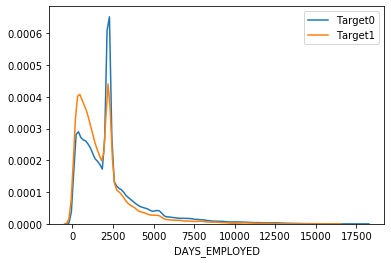

In [38]:
#Compare monthly changes for Target=1 and Target =1
sns.distplot(df_1['DAYS_EMPLOYED'],hist=False,label='Target0')
sns.distplot(df_2['DAYS_EMPLOYED'],hist=False,label='Target1')
plt.show()

<font style="color:Blue"> If no of days employed is 0, they have more difficulties in loan payment </font>

###### Check Gender wise Loyal Customers 

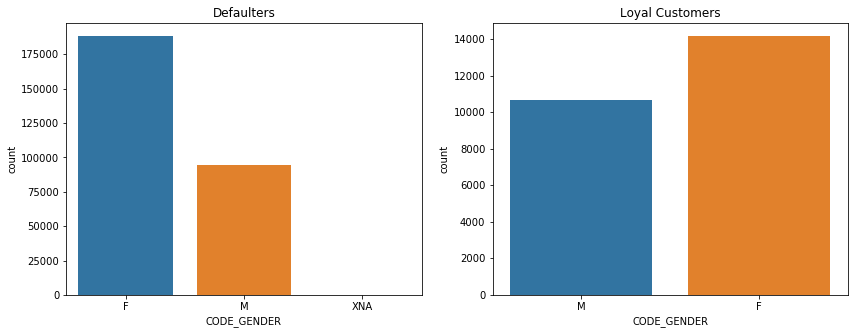

In [39]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
ax1 = sns.countplot(df_1['CODE_GENDER'])
ax1.title.set_text("Defaulters")
plt.subplot(1,2,2)
ax2 = sns.countplot(df_2['CODE_GENDER'])
ax2.title.set_text("Loyal Customers")
plt.show()

<font style="color:Blue"> Female candidates are more loyal towards the loan payment </font>

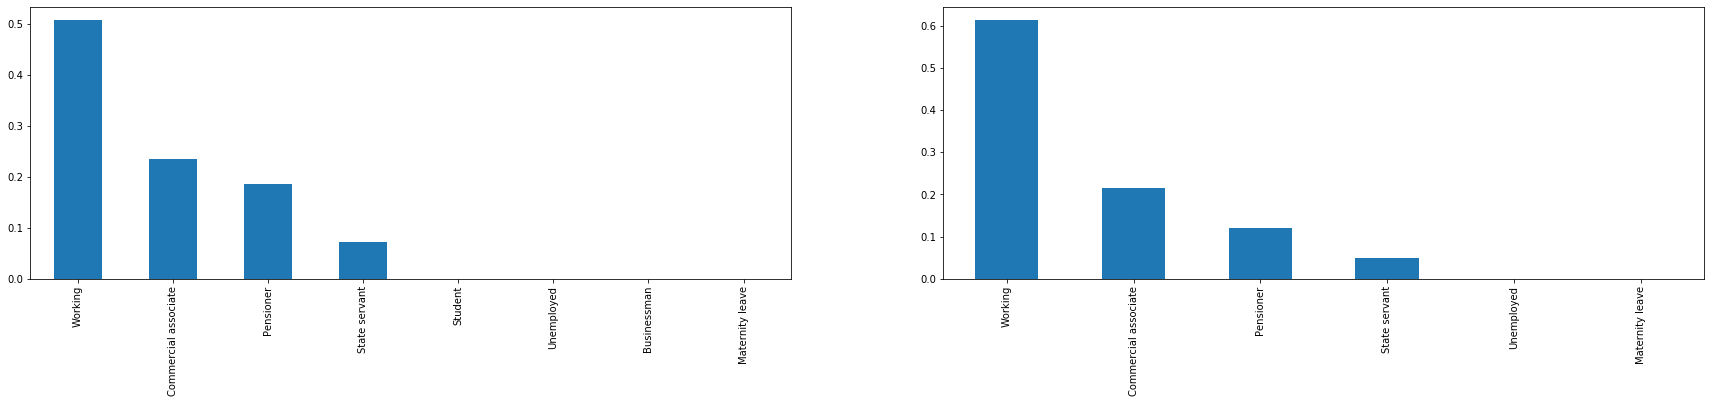

In [40]:
plt.figure(figsize=(30,5))

plt.subplot(1,2,1)
df_1['NAME_INCOME_TYPE'].value_counts(normalize=True).plot(kind='bar')

plt.subplot(1,2,2)
df_2['NAME_INCOME_TYPE'].value_counts(normalize=True).plot(kind='bar')
plt.show()

<font style="color:Blue"> Working professionals followed by Commercial associates are in same propotion of paying and non paying loans. So, this can not be dependent on Income Type parameter </font>

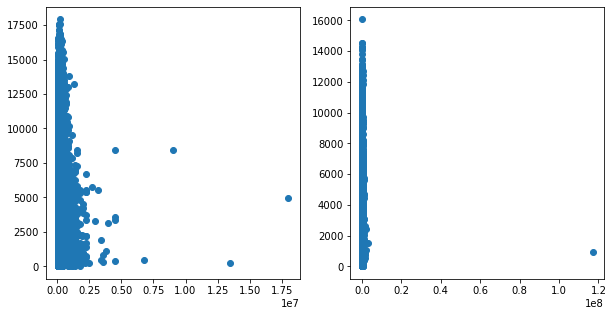

In [41]:
#Bivariate :Continuos
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(df_1['AMT_INCOME_TOTAL'],df_1['DAYS_EMPLOYED'])

plt.subplot(1,2,2)
plt.scatter(df_2['AMT_INCOME_TOTAL'],df_2['DAYS_EMPLOYED'])
plt.show()

<font style="color:Blue"> More no of days employed tend to get payment on time, eventhough the income is low.  </font>

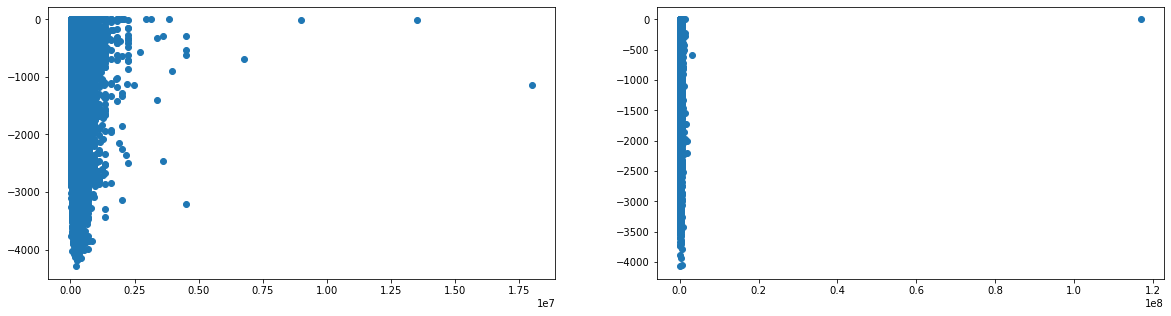

In [42]:
#Bivariate :Continuos
#df_1['DAYS_LAST_PHONE_CHANGE'] = df_1['DAYS_LAST_PHONE_CHANGE'].abs()
#df_2['DAYS_LAST_PHONE_CHANGE'] = df_2['DAYS_LAST_PHONE_CHANGE'].abs()
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.scatter(df_1['AMT_INCOME_TOTAL'],df_1['DAYS_LAST_PHONE_CHANGE'])

plt.subplot(1,2,2)
plt.scatter(df_2['AMT_INCOME_TOTAL'],df_2['DAYS_LAST_PHONE_CHANGE'])
plt.show()

<font style="color:Blue"> From Above two Analysis After fix Income Range of Employees have duficulties paying Loan 
<br/>We have compared Income with Change Phone and Employee Experience</font>

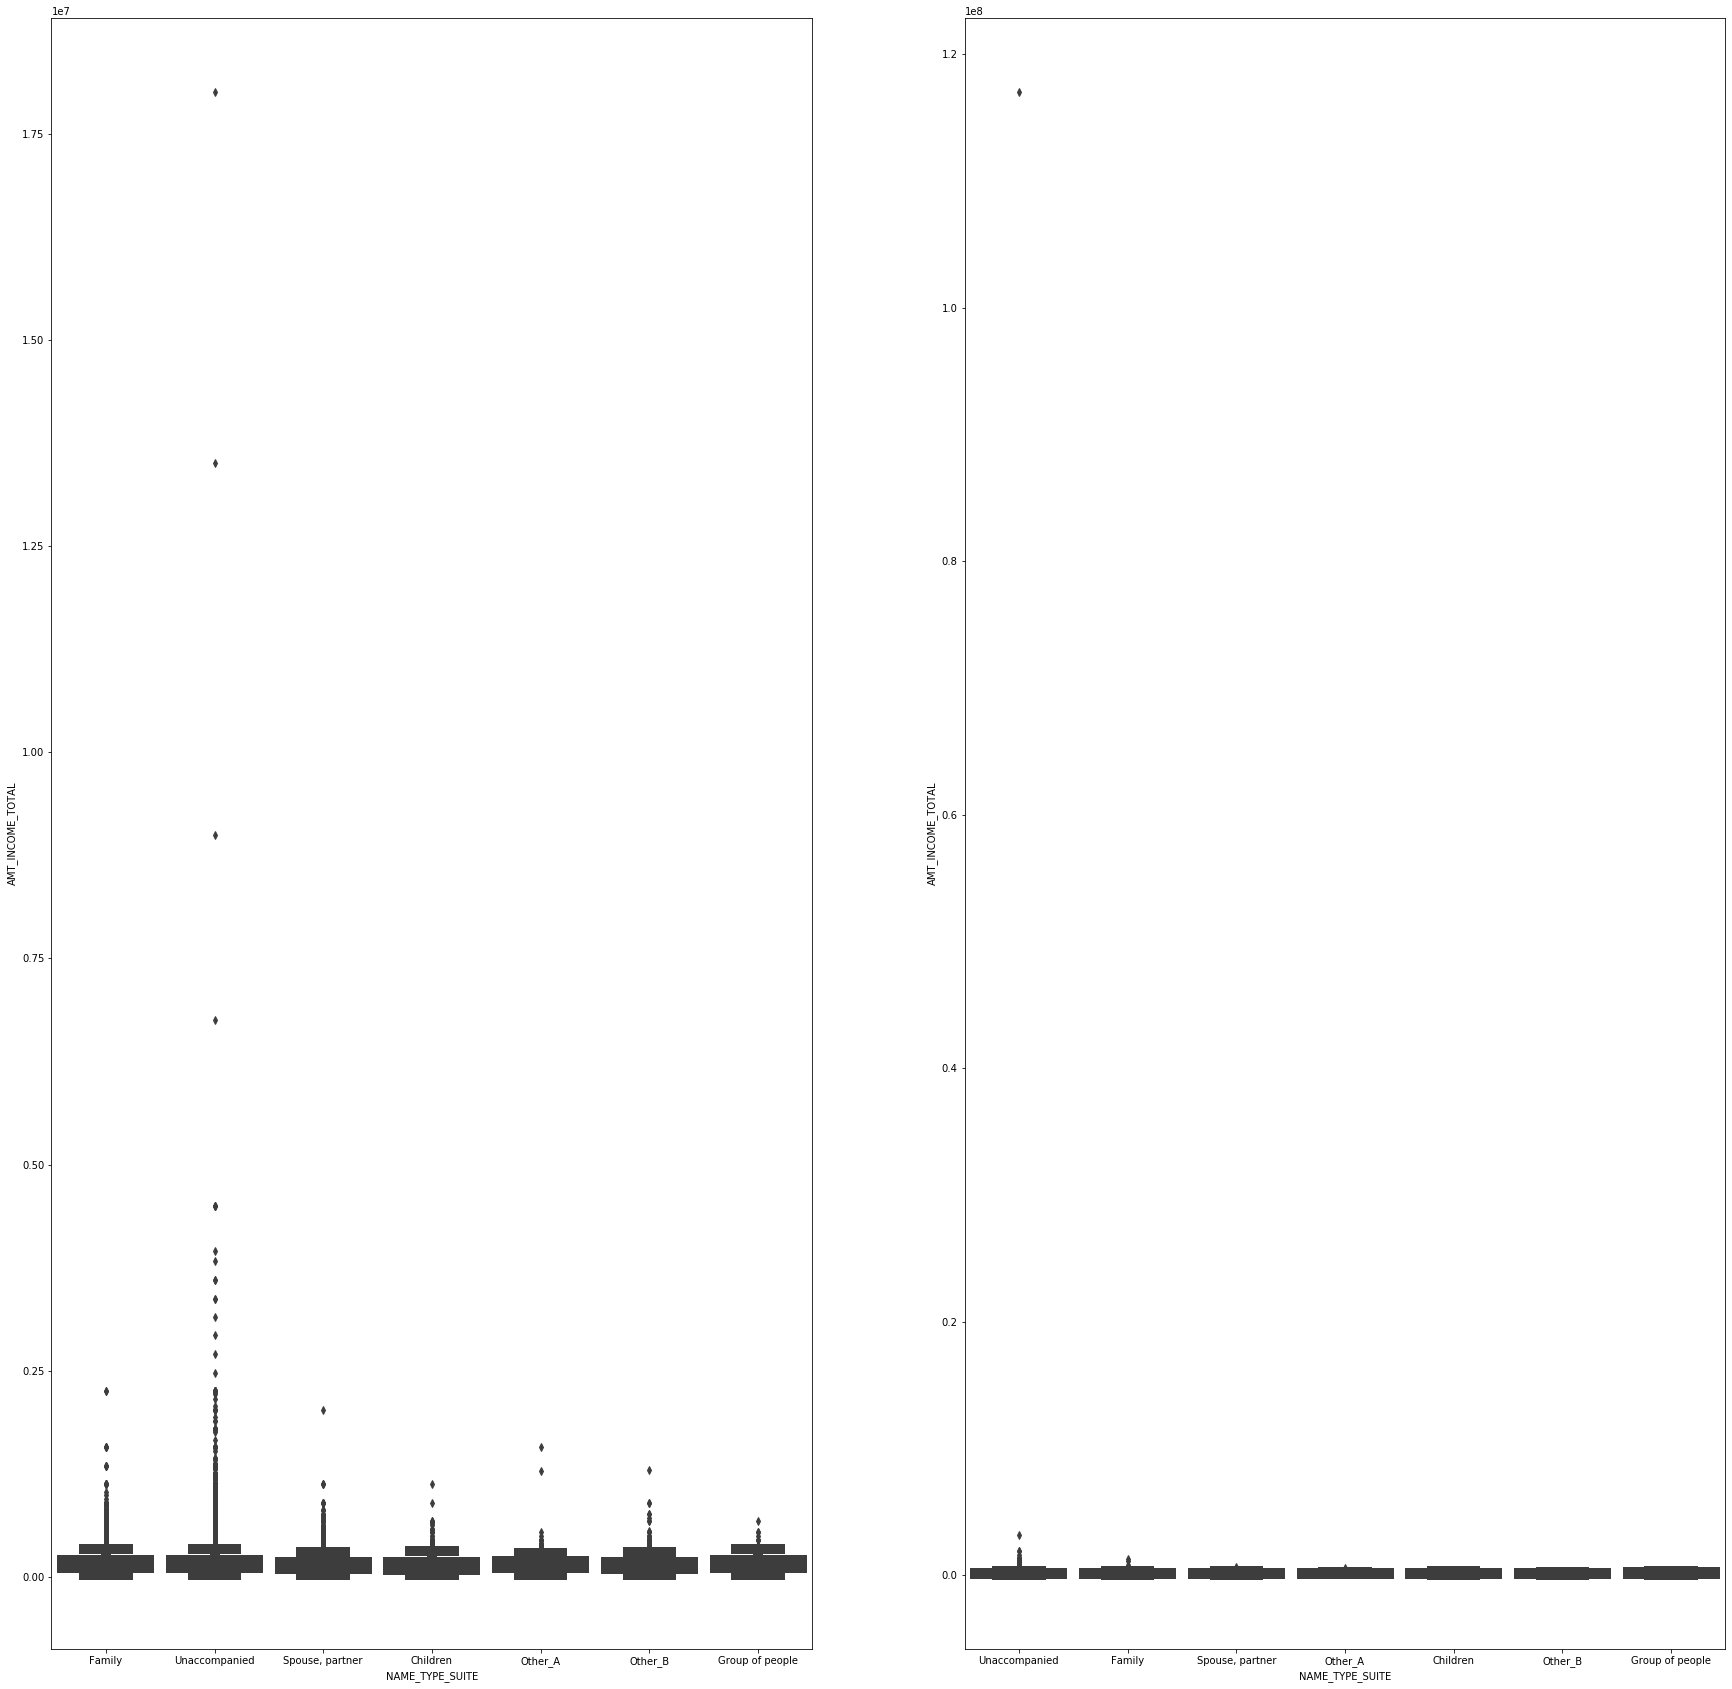

In [43]:
#Bivariate :Continous,Categorical
plt.figure(figsize=(30,30))

plt.subplot(1,2,1)
sns.boxplot(df_1['NAME_TYPE_SUITE'],df_1['AMT_INCOME_TOTAL'],linewidth=10)

plt.subplot(1,2,2)
sns.boxplot(df_2['NAME_TYPE_SUITE'],df_2['AMT_INCOME_TOTAL'],linewidth=10)
plt.show()

<font style="color:Blue"> Unaccompanied name type followed by Family type has more outliers for annual income then rest of the types. Person having highest income also unaccompanies and he has no difficulty in paying loan </font>

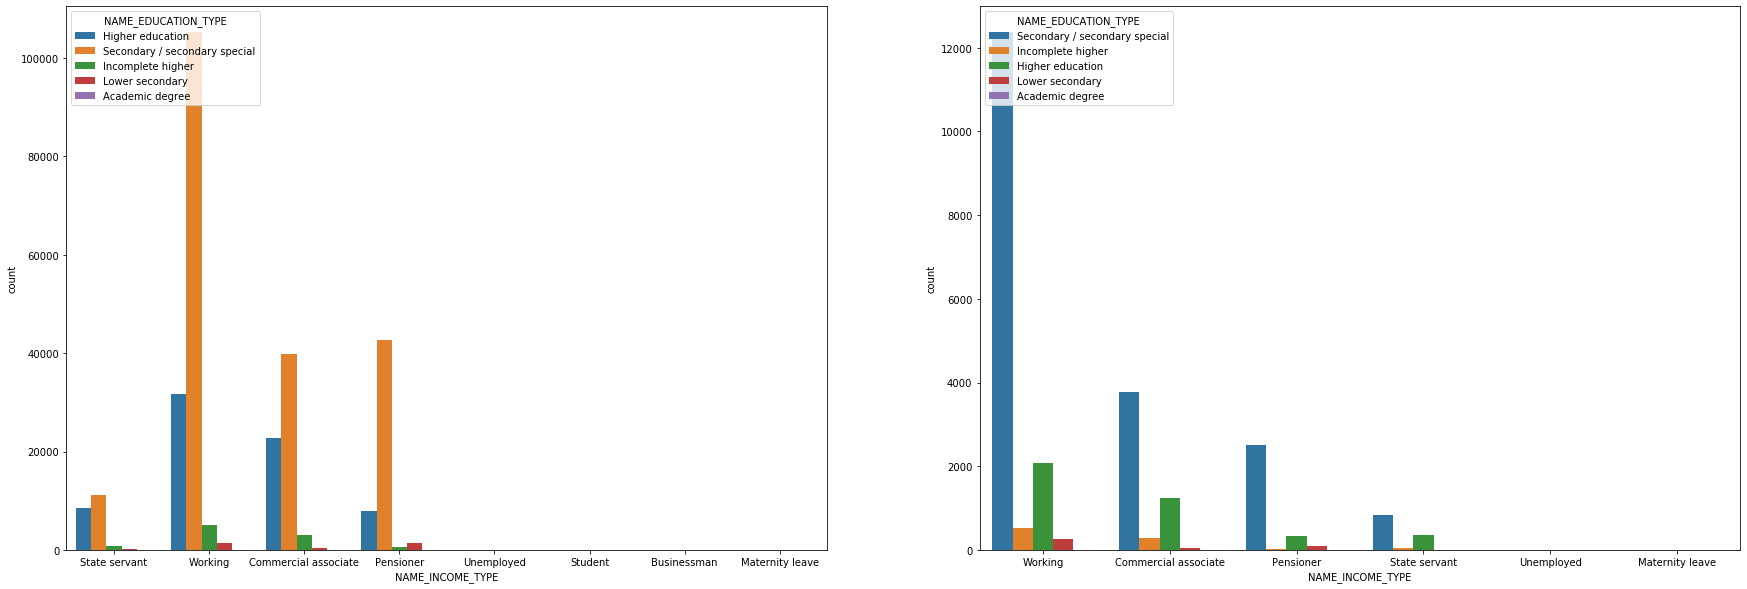

In [44]:
#Bivariate :Continous,Categorical
plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
sns.countplot(x='NAME_INCOME_TYPE' ,hue='NAME_EDUCATION_TYPE' ,data=df_1)


plt.subplot(1,2,2)
sns.countplot(x='NAME_INCOME_TYPE' ,hue='NAME_EDUCATION_TYPE' ,data=df_2)
plt.show()

<font style="color:Blue"> There aren't any student who has difficulty in paying loan.Secondary/Secondary special are highest working. State servant category also has highest Secondary special educated people.  </font>

#### Previsous Application Data Analysis

In [45]:
inp1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [46]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [47]:
# Find Null Values from dataframe
pct_null = inp1.isnull().mean().round(4)*100
pct_null

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [48]:
#Get columns having missing values more than 50%
#50% may vary according to business need and understanding and how important that column data is for business 
missing_features = pct_null[pct_null > 50].index
print(missing_features)

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],
      dtype='object')


In [49]:
#Delete columns with missing values more than 50%
#inp1.drop(missing_features, axis=1, inplace=True)

In [50]:
#Check for columns having less than 13% of missong values to perform data correction
missing_features = pct_null[pct_null < 13].index
print(missing_features)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')


### Merge Application Data Set with Previous Application Data Set

In [51]:
df = pd.merge(inp1, inp0, how='left', on='SK_ID_CURR')

In [52]:
df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_x  AMT_ANNUITY_x  \
0     2030495      271877       Consumer loans       1730.430   
1     2802425      108129           Cash loans      25188.615   
2     2523466      122040           Cash loans      15060.735   
3     2819243      176158           Cash loans      47041.335   
4     1784265      202054           Cash loans      31924.395   

   AMT_APPLICATION  AMT_CREDIT_x  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE_x  \
0          17145.0       17145.0               0.0            17145.0   
1         607500.0      679671.0               NaN           607500.0   
2         112500.0      136444.5               NaN           112500.0   
3         450000.0      470790.0               NaN           450000.0   
4         337500.0      404055.0               NaN           337500.0   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                     SATURDAY                         15   
1                     THURSDAY                         11   
2                      TUESDAY                         11   
3                       MONDAY                          7   
4                     THURSDAY                          9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
0                           Y                       1                0.0   
1                           Y                       1                NaN   
2                           Y                       1                NaN   
3                           Y                       1                NaN   
4                           Y                       1                NaN   

   RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE  \
0               0.182832                  0.867336                    XAP   
1                    NaN                       NaN                    XNA   
2                    NaN                       NaN                    XNA   
3                    NaN                       NaN                    XNA   
4                    NaN                       NaN                Repairs   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            -73  Cash through the bank   
1             Approved           -164                    XNA   
2             Approved           -301  Cash through the bank   
3             Approved           -512  Cash through the bank   
4              Refused           -781  Cash through the bank   

  CODE_REJECT_REASON NAME_TYPE_SUITE_x NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  \
0                XAP               NaN         Repeater              Mobile   
1                XAP     Unaccompanied         Repeater                 XNA   
2                XAP   Spouse, partner         Repeater                 XNA   
3                XAP               NaN         Repeater                 XNA   
4                 HC               NaN         Repeater                 XNA   

  NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0            POS               XNA             Country-wide                35   
1           Cash            x-sell           Contact center                -1   
2           Cash            x-sell  Credit and cash offices                -1   
3           Cash            x-sell  Credit and cash offices                -1   
4           Cash           walk-in  Credit and cash offices                -1   

  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
0         Connectivity         12.0           middle   
1                  XNA         36.0       low_action   
2                  XNA         12.0             high   
3                  XNA         12.0           middle   
4                  XNA         24.0             high   

        PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0  POS mobile with interest            365243.0           -42.0   
1          Cash X-Sell: low            365243.0          -134.0   
2

### Rename Columns

In [53]:
df.rename(columns={'NAME_CONTRACT_TYPE_x':'PRE_NAME_CONTRACT_TYPE', 'AMT_CREDIT_x':'PRE_AMT_CREDIT', 'AMT_ANNUITY_x':'PRE_AMT_ANNUITY',
                  'AMT_GOODS_PRICE_x':'PRE_AMT_GOODS_PRICE', 'NAME_TYPE_SUITE_x': 'PRE_NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START_x':'PRE_WEEKDAY_APPR_PROCESS_START',
                  'HOUR_APPR_PROCESS_START_x':'PRE_HOUR_APPR_PROCESS_START',
                  'NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE', 'AMT_CREDIT_y':'AMT_CREDIT', 'AMT_ANNUITY_y':'AMT_ANNUITY',
                  'AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE_y': 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START_y':'WEEKDAY_APPR_PROCESS_START',
                  'HOUR_APPR_PROCESS_START_y':'HOUR_APPR_PROCESS_START'
                  }, inplace=True)

In [54]:
print(list(df.columns))

['SK_ID_PREV', 'SK_ID_CURR', 'PRE_NAME_CONTRACT_TYPE', 'PRE_AMT_ANNUITY', 'AMT_APPLICATION', 'PRE_AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'PRE_AMT_GOODS_PRICE', 'PRE_WEEKDAY_APPR_PROCESS_START', 'PRE_HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'PRE_NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE

### Categorical Value Analysis 

In [55]:
df['NAME_PAYMENT_TYPE'].value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

<b> Update XNA Categorical Value to some meaningful Category Name like 'Unknown'</b>

In [56]:
df.loc[df['PRE_NAME_CONTRACT_TYPE'] == 'XNA', ['PRE_NAME_CONTRACT_TYPE']] = 'Unknown'
df.loc[df['NAME_PAYMENT_TYPE'] == 'XNA', ['NAME_PAYMENT_TYPE']] = 'Unknown'
df.loc[df['CODE_REJECT_REASON'] == 'XNA', ['CODE_REJECT_REASON']] = 'Unknown'
df.loc[df['PRE_NAME_TYPE_SUITE'] == 'XNA', ['PRE_NAME_TYPE_SUITE']] = 'Unknown'
df.loc[df['NAME_CLIENT_TYPE'] == 'XNA', ['NAME_CLIENT_TYPE']] = 'Unknown'
df.loc[df['NAME_GOODS_CATEGORY'] == 'XNA', ['NAME_GOODS_CATEGORY']] = 'Unknown'
df.loc[df['NAME_PORTFOLIO'] == 'XNA', ['NAME_PORTFOLIO']] = 'Unknown'
df.loc[df['NAME_SELLER_INDUSTRY'] == 'XNA', ['NAME_SELLER_INDUSTRY']] = 'Unknown'
df.loc[df['NAME_YIELD_GROUP'] == 'XNA', ['NAME_YIELD_GROUP']] = 'Unknown'

In [57]:
df['CHANNEL_TYPE'].value_counts()

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

In [58]:
df['NAME_PORTFOLIO'].value_counts()

POS        691011
Cash       461563
Unknown    372230
Cards      144985
Cars          425
Name: NAME_PORTFOLIO, dtype: int64

### Binning
#### Convert Continous Value into Categorical Value
Here Term as CNT_PAYMENT values having continous values, We can Convert them into groups so it will help for analysis

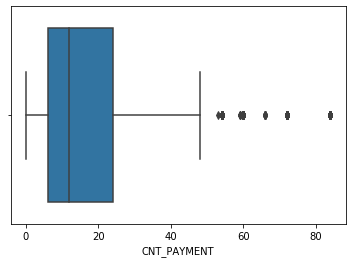

In [59]:
sns.boxplot(df['CNT_PAYMENT'])
plt.show()

In [60]:
# Create New Column with goruped values
df['CNT_PAYMENT_CAT'] = pd.cut(df.CNT_PAYMENT, [0, 5,10, 15,20, 25,30, 35, 100], labels = ['0-5', '5-10', '10-15', '15-20', '20-25','25-30','30-35','35<'])

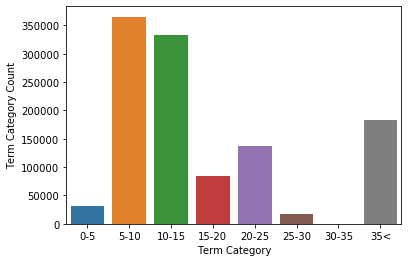

In [61]:
term = (df.groupby(['CNT_PAYMENT_CAT']).agg({"CNT_PAYMENT":'count'})).reset_index()
sns.barplot(data=term, y = "CNT_PAYMENT", x = "CNT_PAYMENT_CAT")
plt.xlabel('Term Category')
plt.ylabel('Term Category Count')
plt.show()

#### Find Outliers
Here there is data input issue or Seller has changed Current location which is far from current

In [62]:
df['SELLERPLACE_AREA'].describe()

count    1.670214e+06
mean     3.139511e+02
std      7.127443e+03
min     -1.000000e+00
25%     -1.000000e+00
50%      3.000000e+00
75%      8.200000e+01
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64

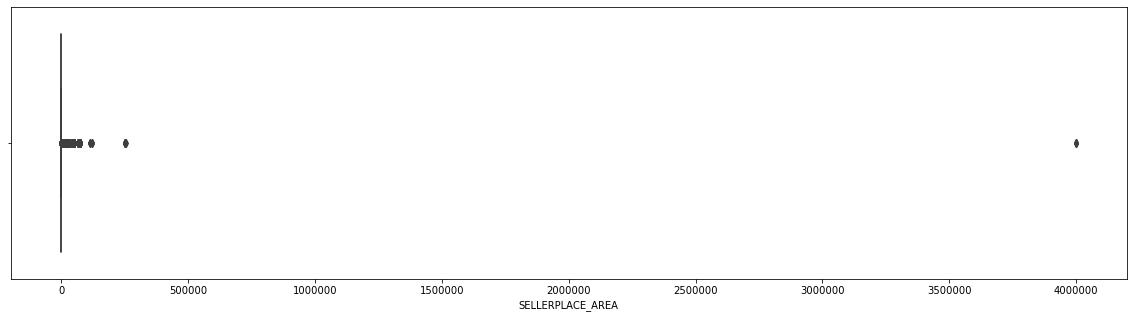

In [63]:
plt.figure(figsize=(20,5))
sns.boxplot(df['SELLERPLACE_AREA'])
plt.show()

In [64]:
df[df['SELLERPLACE_AREA']>200000].size

2430

#### Replace missing value to actual missing value
Here SELLERPLACE_AREA value is missing and that mssing value is mentioned with value as -1
We will replace that missing value -1 with NaN and make them actually missing

In [65]:
df.loc[df['SELLERPLACE_AREA'] == -1, ['SELLERPLACE_AREA']] = np.NaN

In [66]:
df['SELLERPLACE_AREA'].isnull().mean().round(4)*100

45.660000000000004

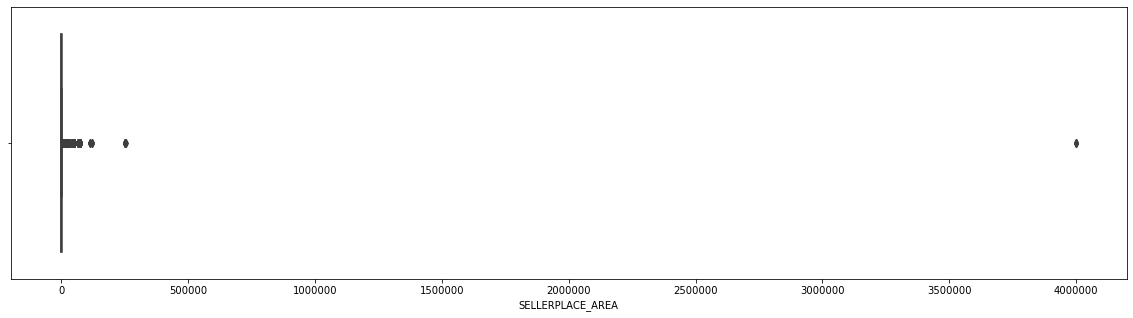

In [67]:
plt.figure(figsize=(20,5))
sns.boxplot(df['SELLERPLACE_AREA'])
plt.show()

##### Median value can be used to replcae Outlies

In [68]:
df['SELLERPLACE_AREA'].quantile(.5)

65.0

#### Application Start Hours to check most used hours to start Application

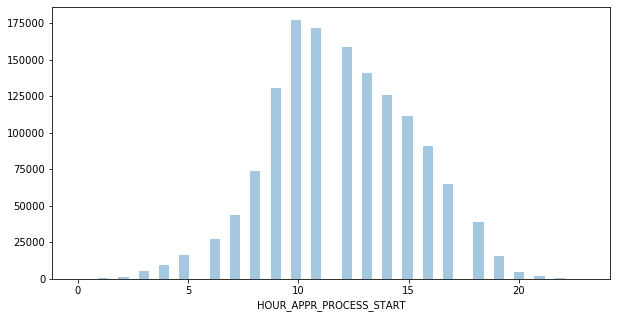

In [69]:
plt.figure(figsize=(10,5))
sns.distplot(df['HOUR_APPR_PROCESS_START'], kde=False)
plt.show()

### Check Data Balance

In [70]:
#checking impabalnce percentage
100*df.NAME_CONTRACT_STATUS.value_counts(normalize = True)

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

### Divide Data Frame
Divide data into two data Frames for analysis

In [71]:
prev_approved = df[df['NAME_CONTRACT_STATUS'].isin(['Approved','Unused offer'])]
prev_rejected = df[df['NAME_CONTRACT_STATUS'].isin(['Canceled','Refused'])]

In [72]:
print("Previoulsy Approved" + str(prev_approved.shape))
print("Previously Rejected" + str(prev_rejected.shape))

Previoulsy Approved(1063217, 162)
Previously Rejected(606997, 162)


In [73]:
1036781/633433

1.6367650564463803

###### Application approved count is 1.6 times compare to Rejected Applications

### Column Analysis
Previous Applications Rejected data set Analysis

In [74]:
prev_rejected.head()

SK_ID_PREV  SK_ID_CURR PRE_NAME_CONTRACT_TYPE  PRE_AMT_ANNUITY  \
4     1784265      202054             Cash loans        31924.395   
6     2315218      175704             Cash loans              NaN   
7     1656711      296299             Cash loans              NaN   
8     2367563      342292             Cash loans              NaN   
9     2579447      334349             Cash loans              NaN   

   AMT_APPLICATION  PRE_AMT_CREDIT  AMT_DOWN_PAYMENT  PRE_AMT_GOODS_PRICE  \
4         337500.0        404055.0               NaN             337500.0   
6              0.0             0.0               NaN                  NaN   
7              0.0             0.0               NaN                  NaN   
8              0.0             0.0               NaN                  NaN   
9              0.0             0.0               NaN                  NaN   

  PRE_WEEKDAY_APPR_PROCESS_START  PRE_HOUR_APPR_PROCESS_START  \
4                       THURSDAY                            9   
6                        TUESDAY                           11   
7                         MONDAY                            7   
8                         MONDAY                           15   
9                       SATURDAY                           15   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
4                           Y                       1                NaN   
6                           Y                       1                NaN   
7                           Y                       1                NaN   
8                           Y                       1                NaN   
9                           Y                       1                NaN   

   RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE  \
4                    NaN                       NaN                Repairs   
6                    NaN                       NaN                    XNA   
7                    NaN                       NaN                    XNA   
8                    NaN                       NaN                    XNA   
9                    NaN                       NaN                    XNA   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
4              Refused           -781  Cash through the bank   
6             Canceled            -14                Unknown   
7             Canceled            -21                Unknown   
8             Canceled           -386                Unknown   
9             Canceled            -57                Unknown   

  CODE_REJECT_REASON PRE_NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  \
4                 HC                 NaN         Repeater             Unknown   
6                XAP                 NaN         Repeater             Unknown   
7                XAP                 NaN         Repeater             Unknown   
8                XAP                 NaN         Repeater             Unknown   
9                XAP                 NaN         Repeater             Unknown   

  NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
4           Cash           walk-in  Credit and cash offices               NaN   
6        Unknown               XNA  Credit and cash offices               NaN   
7        Unknown               XNA  Credit and cash offices               NaN   
8        Unknown               XNA  Credit and cash offices               NaN   
9        Unknown               XNA  Credit and cash offices               NaN   

  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP PRODUCT_COMBINATION  \
4              Unknown         24.0             high   Cash Street: high   
6              Unknown          NaN          Unknown                Cash   
7              Unknown          NaN          Unknown                Cash   
8              Unknown          NaN          Unknown                Cash   
9              Unknown          NaN          Unknown                Cash   

In [75]:
prev_rejected.isnull().mean().round(4)*100

SK_ID_PREV                          0.00
SK_ID_CURR                          0.00
PRE_NAME_CONTRACT_TYPE              0.00
PRE_AMT_ANNUITY                    57.12
AMT_APPLICATION                     0.00
PRE_AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT                   85.50
PRE_AMT_GOODS_PRICE                56.45
PRE_WEEKDAY_APPR_PROCESS_START      0.00
PRE_HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT         0.00
NFLAG_LAST_APPL_IN_DAY              0.00
RATE_DOWN_PAYMENT                  85.50
RATE_INTEREST_PRIMARY             100.00
RATE_INTEREST_PRIVILEGED          100.00
NAME_CASH_LOAN_PURPOSE              0.00
NAME_CONTRACT_STATUS                0.00
DAYS_DECISION                       0.00
NAME_PAYMENT_TYPE                   0.00
CODE_REJECT_REASON                  0.00
PRE_NAME_TYPE_SUITE                70.37
NAME_CLIENT_TYPE                    0.00
NAME_GOODS_CATEGORY                 0.00
NAME_PORTFOLIO                      0.00
NAME_PRODUCT_TYP

###### Previous Applications Approved data set Analysis

In [76]:
prev_approved.head()

SK_ID_PREV  SK_ID_CURR PRE_NAME_CONTRACT_TYPE  PRE_AMT_ANNUITY  \
0     2030495      271877         Consumer loans         1730.430   
1     2802425      108129             Cash loans        25188.615   
2     2523466      122040             Cash loans        15060.735   
3     2819243      176158             Cash loans        47041.335   
5     1383531      199383             Cash loans        23703.930   

   AMT_APPLICATION  PRE_AMT_CREDIT  AMT_DOWN_PAYMENT  PRE_AMT_GOODS_PRICE  \
0          17145.0         17145.0               0.0              17145.0   
1         607500.0        679671.0               NaN             607500.0   
2         112500.0        136444.5               NaN             112500.0   
3         450000.0        470790.0               NaN             450000.0   
5         315000.0        340573.5               NaN             315000.0   

  PRE_WEEKDAY_APPR_PROCESS_START  PRE_HOUR_APPR_PROCESS_START  \
0                       SATURDAY                           15   
1                       THURSDAY                           11   
2                        TUESDAY                           11   
3                         MONDAY                            7   
5                       SATURDAY                            8   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
0                           Y                       1                0.0   
1                           Y                       1                NaN   
2                           Y                       1                NaN   
3                           Y                       1                NaN   
5                           Y                       1                NaN   

   RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE  \
0               0.182832                  0.867336                    XAP   
1                    NaN                       NaN                    XNA   
2                    NaN                       NaN                    XNA   
3                    NaN                       NaN                    XNA   
5                    NaN                       NaN      Everyday expenses   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            -73  Cash through the bank   
1             Approved           -164                Unknown   
2             Approved           -301  Cash through the bank   
3             Approved           -512  Cash through the bank   
5             Approved           -684  Cash through the bank   

  CODE_REJECT_REASON PRE_NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  \
0                XAP                 NaN         Repeater              Mobile   
1                XAP       Unaccompanied         Repeater             Unknown   
2                XAP     Spouse, partner         Repeater             Unknown   
3                XAP                 NaN         Repeater             Unknown   
5                XAP              Family         Repeater             Unknown   

  NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0            POS               XNA             Country-wide              35.0   
1           Cash            x-sell           Contact center               NaN   
2           Cash            x-sell  Credit and cash offices               NaN   
3           Cash            x-sell  Credit and cash offices               NaN   
5           Cash            x-sell  Credit and cash offices               NaN   

  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
0         Connectivity         12.0           middle   
1              Unknown         36.0       low_action   
2              Unknown         12.0             high   
3              Unknown         12.0           middle   
5              Unknown         18.0       low_normal   

        PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0  POS mobile with interest            365243.0    

In [77]:
#Check Null values in Data set
prev_approved.isnull().mean().round(4)*100

SK_ID_PREV                         0.00
SK_ID_CURR                         0.00
PRE_NAME_CONTRACT_TYPE             0.00
PRE_AMT_ANNUITY                    2.40
AMT_APPLICATION                    0.00
PRE_AMT_CREDIT                     0.00
AMT_DOWN_PAYMENT                  35.44
PRE_AMT_GOODS_PRICE                4.03
PRE_WEEKDAY_APPR_PROCESS_START     0.00
PRE_HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT        0.00
NFLAG_LAST_APPL_IN_DAY             0.00
RATE_DOWN_PAYMENT                 35.44
RATE_INTEREST_PRIMARY             99.44
RATE_INTEREST_PRIVILEGED          99.44
NAME_CASH_LOAN_PURPOSE             0.00
NAME_CONTRACT_STATUS               0.00
DAYS_DECISION                      0.00
NAME_PAYMENT_TYPE                  0.00
CODE_REJECT_REASON                 0.00
PRE_NAME_TYPE_SUITE               36.99
NAME_CLIENT_TYPE                   0.00
NAME_GOODS_CATEGORY                0.00
NAME_PORTFOLIO                     0.00
NAME_PRODUCT_TYPE                  0.00


### Data Analysis

#### Find Correlation
1. Approved Applications
2. Rejected Applications

In [78]:
#Find correlation
#prev_approved.corr()

SK_ID_PREV  SK_ID_CURR  PRE_AMT_ANNUITY  \
SK_ID_PREV                      1.000000   -0.000035         0.004886   
SK_ID_CURR                     -0.000035    1.000000         0.000844   
PRE_AMT_ANNUITY                 0.004886    0.000844         1.000000   
AMT_APPLICATION                 0.003904   -0.000057         0.814358   
PRE_AMT_CREDIT                  0.004631   -0.000055         0.826016   
AMT_DOWN_PAYMENT               -0.001188    0.000662         0.257783   
PRE_AMT_GOODS_PRICE             0.004252    0.000019         0.830871   
PRE_HOUR_APPR_PROCESS_START    -0.000613    0.001637        -0.038392   
NFLAG_LAST_APPL_IN_DAY          0.001670    0.000555        -0.012088   
RATE_DOWN_PAYMENT              -0.002793    0.001581        -0.104995   
RATE_INTEREST_PRIMARY           0.012969    0.033197         0.141823   
RATE_INTEREST_PRIVILEGED       -0.022312   -0.016757        -0.202335   
DAYS_DECISION                   0.002210   -0.000257         0.254578   
SELLERPLACE_AREA                0.000291    0.001861         0.001493   
CNT_PAYMENT                     0.004649   -0.001157         0.344180   
DAYS_FIRST_DRAWING             -0.001478   -0.001329         0.052839   
DAYS_FIRST_DUE                 -0.000071   -0.000757        -0.053295   
DAYS_LAST_DUE_1ST_VERSION       0.001222    0.000252        -0.068877   
DAYS_LAST_DUE                   0.001915   -0.000318         0.082659   
DAYS_TERMINATION                0.001781   -0.000020         0.068022   
NFLAG_INSURED_ON_APPROVAL       0.003986    0.000876         0.283080   
TARGET                         -0.000525   -0.000841        -0.024751   
CNT_CHILDREN                   -0.001383   -0.001838        -0.041922   
AMT_INCOME_TOTAL               -0.000771   -0.001064         0.106446   
AMT_CREDIT                      0.000652   -0.002447         0.147658   
AMT_ANNUITY                     0.000740   -0.002325         0.198966   
AMT_GOODS_PRICE                 0.000767   -0.002307         0.150025   
REGION_POPULATION_RELATIVE      0.001138   -0.001006         0.085981   
DAYS_BIRTH                     -0.001920   -0.000712        -0.090952   
DAYS_EMPLOYED                  -0.000423    0.000110         0.044259   
DAYS_REGISTRATION              -0.000995   -0.000805        -0.013618   
DAYS_ID_PUBLISH                 0.000361    0.000909        -0.005849   
OWN_CAR_AGE                     0.001211    0.000337        -0.080717   
FLAG_MOBIL                           NaN         NaN              NaN   
FLAG_EMP_PHONE                 -0.001576    0.000555        -0.004182   
FLAG_WORK_PHONE                -0.000985   -0.000596        -0.048954   
FLAG_CONT_MOBILE               -0.001492    0.003017        -0.003962   
FLAG_PHONE                     -0.000021    0.002437         0.003958   
FLAG_EMAIL                     -0.000310   -0.000258         0.048033   
CNT_FAM_MEMBERS                -0.001520   -0.003333        -0.009315   
REGION_RATING_CLIENT           -0.000880   -0.000184        -0.080244   
REGION_RATING_CLIENT_W_CITY    -0.000950   -0.000328        -0.092850   
HOUR_APPR_PROCESS_START        -0.000682   -0.000050         0.012274   
REG_REGION_NOT_LIVE_REGION      0.001270    0.001339         0.013135   
REG_REGION_NOT_WORK_REGION     -0.000950    0.003188         0.027361   
LIVE_REGION_NOT_WORK_REGION    -0.001256    0.003938         0.027042   
REG_CITY_NOT_LIVE_CITY          0.000984   -0.000340        -0.023938   
REG_CITY_NOT_WORK_CITY         -0.001146    0.000856        -0.030774   
LIVE_CITY_NOT_WORK_CITY        -0.001975    0.002196        -0.018724   
EXT_SOURCE_1                    0.000359   -0.002694         0.115358   
EXT_SOURCE_2                   -0.001458    0.002126         0.080464   
EXT_SOURCE_3                   -0.002051   -0.001197         0.021107   
APARTMENTS_AVG                  0.001218    0.002653         0.055981   
BASEMENTAREA_AVG                0.001692   -0.001825         0.032436   
YEARS_BEGINEXPL

In [79]:
#prev_rejected.corr()

SK_ID_PREV  SK_ID_CURR  PRE_AMT_ANNUITY  \
SK_ID_PREV                      1.000000   -0.001021         0.005766   
SK_ID_CURR                     -0.001021    1.000000        -0.001784   
PRE_AMT_ANNUITY                 0.005766   -0.001784         1.000000   
AMT_APPLICATION                 0.003903    0.000748         0.818620   
PRE_AMT_CREDIT                  0.003963    0.000555         0.820306   
AMT_DOWN_PAYMENT               -0.003588   -0.003607         0.309656   
PRE_AMT_GOODS_PRICE             0.008778   -0.000925         0.822826   
PRE_HOUR_APPR_PROCESS_START     0.001878    0.005244        -0.013056   
NFLAG_LAST_APPL_IN_DAY         -0.000733    0.000059         0.088726   
RATE_DOWN_PAYMENT               0.001107   -0.000907        -0.080960   
RATE_INTEREST_PRIMARY                NaN         NaN              NaN   
RATE_INTEREST_PRIVILEGED             NaN         NaN              NaN   
DAYS_DECISION                   0.003141   -0.003623         0.289466   
SELLERPLACE_AREA               -0.000132    0.002820        -0.022156   
CNT_PAYMENT                     0.008247    0.000754         0.424531   
DAYS_FIRST_DRAWING                   NaN         NaN              NaN   
DAYS_FIRST_DUE                       NaN         NaN              NaN   
DAYS_LAST_DUE_1ST_VERSION            NaN         NaN              NaN   
DAYS_LAST_DUE                        NaN         NaN              NaN   
DAYS_TERMINATION                     NaN         NaN              NaN   
NFLAG_INSURED_ON_APPROVAL            NaN         NaN              NaN   
TARGET                          0.000133   -0.002107        -0.024138   
CNT_CHILDREN                   -0.001519   -0.005328        -0.023214   
AMT_INCOME_TOTAL                0.000385    0.004124         0.258171   
AMT_CREDIT                      0.001548    0.001347         0.205509   
AMT_ANNUITY                     0.001296   -0.000883         0.232507   
AMT_GOODS_PRICE                 0.002031    0.002667         0.207031   
REGION_POPULATION_RELATIVE      0.000129    0.002279         0.072387   
DAYS_BIRTH                      0.001832   -0.004845        -0.082867   
DAYS_EMPLOYED                  -0.000737   -0.002118         0.065547   
DAYS_REGISTRATION              -0.001367   -0.007403        -0.001336   
DAYS_ID_PUBLISH                 0.001806    0.002999        -0.014411   
OWN_CAR_AGE                    -0.003723   -0.001565        -0.092380   
FLAG_MOBIL                           NaN         NaN              NaN   
FLAG_EMP_PHONE                  0.001830   -0.003082         0.027005   
FLAG_WORK_PHONE                 0.003489    0.001164        -0.013915   
FLAG_CONT_MOBILE               -0.001052    0.004656        -0.004027   
FLAG_PHONE                      0.003372    0.004714         0.018238   
FLAG_EMAIL                      0.001799    0.001136         0.045686   
CNT_FAM_MEMBERS                -0.001340   -0.005471         0.010649   
REGION_RATING_CLIENT           -0.001051   -0.002395        -0.068170   
REGION_RATING_CLIENT_W_CITY    -0.001934   -0.002441        -0.079729   
HOUR_APPR_PROCESS_START        -0.000506    0.003002         0.021603   
REG_REGION_NOT_LIVE_REGION      0.001020    0.003596         0.016835   
REG_REGION_NOT_WORK_REGION      0.001325    0.005144         0.040750   
LIVE_REGION_NOT_WORK_REGION     0.001577    0.004734         0.040751   
REG_CITY_NOT_LIVE_CITY          0.001707   -0.002699        -0.022201   
REG_CITY_NOT_WORK_CITY          0.001649   -0.001528        -0.021221   
LIVE_CITY_NOT_WORK_CITY         0.001393    0.000678        -0.004886   
EXT_SOURCE_1                    0.000519    0.000449         0.116603   
EXT_SOURCE_2                    0.000226   -0.002183         0.089497   
EXT_SOURCE_3                   -0.003162   -0.000436        -0.017523   
APARTMENTS_AVG                  0.001046   -0.003228         0.046278   
BASEMENTAREA_AVG                0.000021   -0.006552         0.027562   
YEARS_BEGINEXPL

In [80]:
#As it has many rows we can not identify corr with matrix or heatmap
#Remove repetative entry 
corr = prev_approved.corr()
corr= corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
#Reseting index
corr_df = corr.unstack().reset_index()
#Naming columns
corr_df.columns = ['var1','var2','Correlation']
corr_df.dropna(subset = ['Correlation'],inplace = True)
corr_df['Correlation_Abs'] = corr_df['Correlation'].abs()
corr_df.sort_values("Correlation_Abs",ascending=False,inplace=True)
corr_df.head(10)

var1                      var2  Correlation  \
16031             WORKING_YEARS             DAYS_EMPLOYED     1.000000   
765         PRE_AMT_GOODS_PRICE           AMT_APPLICATION     1.000000   
10596          YEARS_BUILD_MEDI           YEARS_BUILD_AVG     0.998594   
12414  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998542   
11236            FLOORSMIN_MEDI             FLOORSMIN_AVG     0.997405   
11108            FLOORSMAX_MEDI             FLOORSMAX_AVG     0.996923   
10980            ENTRANCES_MEDI             ENTRANCES_AVG     0.996899   
10852            ELEVATORS_MEDI             ELEVATORS_AVG     0.996213   
10724           COMMONAREA_MEDI            COMMONAREA_AVG     0.995728   
11620           LIVINGAREA_MEDI            LIVINGAREA_AVG     0.995305   

       Correlation_Abs  
16031         1.000000  
765           1.000000  
10596         0.998594  
12414         0.998542  
11236         0.997405  
11108         0.996923  
10980         0.996899  
10852         0.996213  
10724         0.995728  
11620         0.995305

In [81]:
#Performing same actions with another dataframe
corr = prev_rejected.corr()
corr= corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns = ['var1','var2','Correlation']
corr_df.dropna(subset = ['Correlation'],inplace = True)
corr_df['Correlation_Abs'] = corr_df['Correlation'].abs()
corr_df.sort_values("Correlation_Abs",ascending=False,inplace=True)
corr_df.head(10)

var1                      var2  Correlation  \
16031             WORKING_YEARS             DAYS_EMPLOYED     1.000000   
765         PRE_AMT_GOODS_PRICE           AMT_APPLICATION     0.999720   
12414  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998591   
10596          YEARS_BUILD_MEDI           YEARS_BUILD_AVG     0.998589   
11748  NONLIVINGAPARTMENTS_MEDI   NONLIVINGAPARTMENTS_AVG     0.998269   
11236            FLOORSMIN_MEDI             FLOORSMIN_AVG     0.997174   
11108            FLOORSMAX_MEDI             FLOORSMAX_AVG     0.996951   
10980            ENTRANCES_MEDI             ENTRANCES_AVG     0.996932   
10852            ELEVATORS_MEDI             ELEVATORS_AVG     0.996113   
10340         BASEMENTAREA_MEDI          BASEMENTAREA_AVG     0.996060   

       Correlation_Abs  
16031         1.000000  
765           0.999720  
12414         0.998591  
10596         0.998589  
11748         0.998269  
11236         0.997174  
11108         0.996951  
10980         0.996932  
10852         0.996113  
10340         0.996060

Approved Application VS Rejected Applications<br />
Annuity Amount of Rejected Application is closer to Zero and having more outliers<br />
Annuity Amount of Approved Applications is comparatively having less outliers

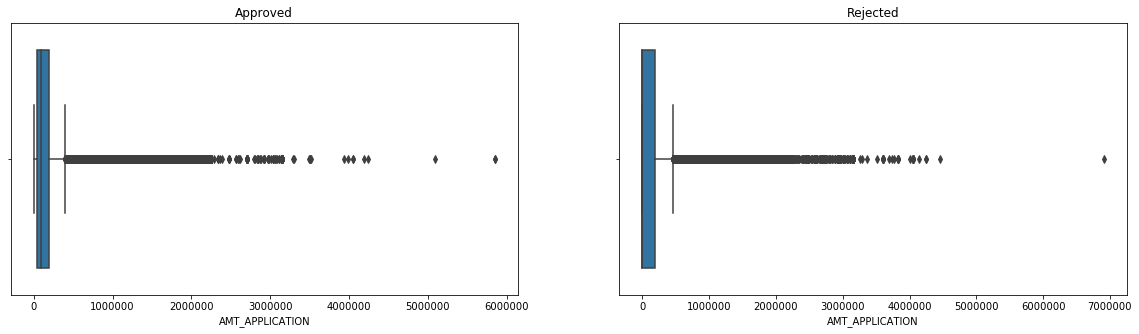

In [82]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax1 = sns.boxplot(prev_approved['AMT_APPLICATION'])
ax1.title.set_text('Approved')
plt.subplot(1,2,2)
ax2 = sns.boxplot(prev_rejected['AMT_APPLICATION'])
ax2.title.set_text('Rejected')
plt.show()

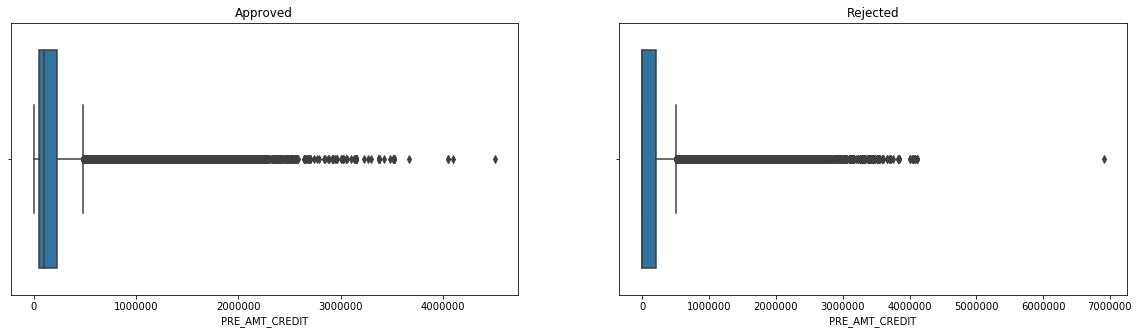

In [83]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax1 = sns.boxplot(prev_approved['PRE_AMT_CREDIT'])
ax1.title.set_text('Approved')
plt.subplot(1,2,2)
ax2 = sns.boxplot(prev_rejected['PRE_AMT_CREDIT'])
ax2.title.set_text('Rejected')
plt.show()

###### Payment Term Category 
Following graphs shows that
1. If Term is below 20 years then more the chances of getting approved
2. If Term is more than 35 years then mre chances of rejecting application

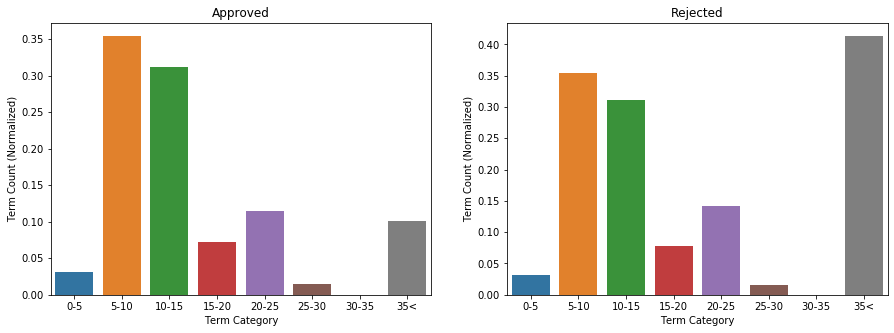

In [84]:
# Univariate: Categorical
d1 = prev_approved['CNT_PAYMENT_CAT'].value_counts(normalize = True).to_frame().reset_index()
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
ax1 = sns.barplot(data = d1, x='index', y='CNT_PAYMENT_CAT')
ax1.set(xlabel='Term Category', ylabel='Term Count (Normalized)')
ax1.title.set_text('Approved')
#prev_approved['CNT_PAYMENT_CAT'].value_counts(normalize = True).plot(kind = 'bar')
d2 = prev_rejected['CNT_PAYMENT_CAT'].value_counts(normalize = True).to_frame().reset_index()
plt.subplot(1,2,2)
sns.barplot(data = d2, x='index', y='CNT_PAYMENT_CAT')
ax1 = sns.barplot(data = d1, x='index', y='CNT_PAYMENT_CAT')
ax1.set(xlabel='Term Category', ylabel='Term Count (Normalized)')
ax1.title.set_text('Rejected')
plt.show()

###### Contract Name Type
Following graphs shows that
1. If the Loan Name type is Consumer then more the chances of getting approved
2. If the Loan Name type is Cash then mre chances of rejecting application

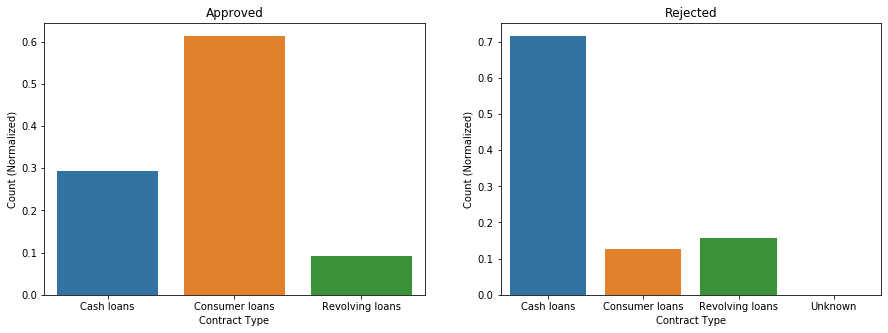

In [85]:
#PRE_WEEKDAY_APPR_PROCESS_START
d1 = prev_approved['PRE_NAME_CONTRACT_TYPE'].value_counts(normalize = True).to_frame().reset_index().sort_values('index')
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
ax1 = sns.barplot(data = d1, x='index', y='PRE_NAME_CONTRACT_TYPE')
ax1.set(xlabel='Contract Type', ylabel='Count (Normalized)')
ax1.title.set_text('Approved')

d2 = prev_rejected['PRE_NAME_CONTRACT_TYPE'].value_counts(normalize = True).to_frame().reset_index().sort_values('index')
plt.subplot(1,2,2)
ax2 = sns.barplot(data = d2, x='index', y='PRE_NAME_CONTRACT_TYPE')
ax2.set(xlabel='Contract Type', ylabel='Count (Normalized)')
ax2.title.set_text('Rejected')
plt.show()

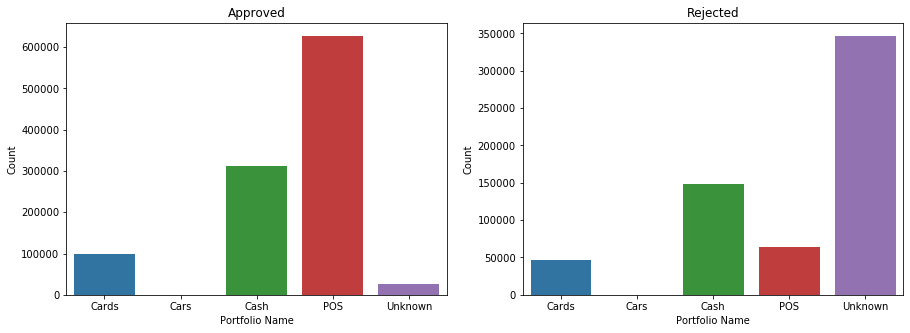

In [86]:
#NAME_PORTFOLIO
d1 = prev_approved['NAME_PORTFOLIO'].value_counts().to_frame().reset_index().sort_values('index')
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
ax1 = sns.barplot(data = d1, x='index', y='NAME_PORTFOLIO')
ax1.set(xlabel='Portfolio Name', ylabel='Count')
ax1.title.set_text('Approved')

d2 = prev_rejected['NAME_PORTFOLIO'].value_counts().to_frame().reset_index().sort_values('index')
plt.subplot(1,2,2)
ax2 = sns.barplot(data = d2, x='index', y='NAME_PORTFOLIO')
ax2.set(xlabel='Portfolio Name', ylabel='Count')
ax2.title.set_text('Rejected')
plt.show()

<font style="color:blue">If customer portpolio is Unknown then there are high chances of Application getting rejected</font><br/>
<font style="color:blue">Portfolio Name with POS are mostly Approved By bank</font>

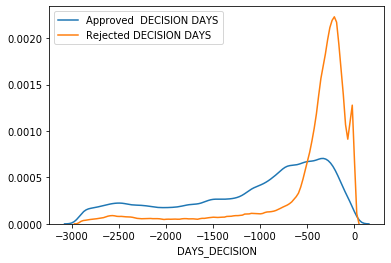

In [87]:
sns.distplot(prev_approved['DAYS_DECISION'], hist=False, label = 'Approved  DECISION DAYS')
sns.distplot(prev_rejected['DAYS_DECISION'], hist = False, label = 'Rejected DECISION DAYS')
plt.show()

### Bivariate: Continuous-Continuous valiables Analysis
Looks Like there is no such strong relation between countinuous variables with Application Rejection Rate

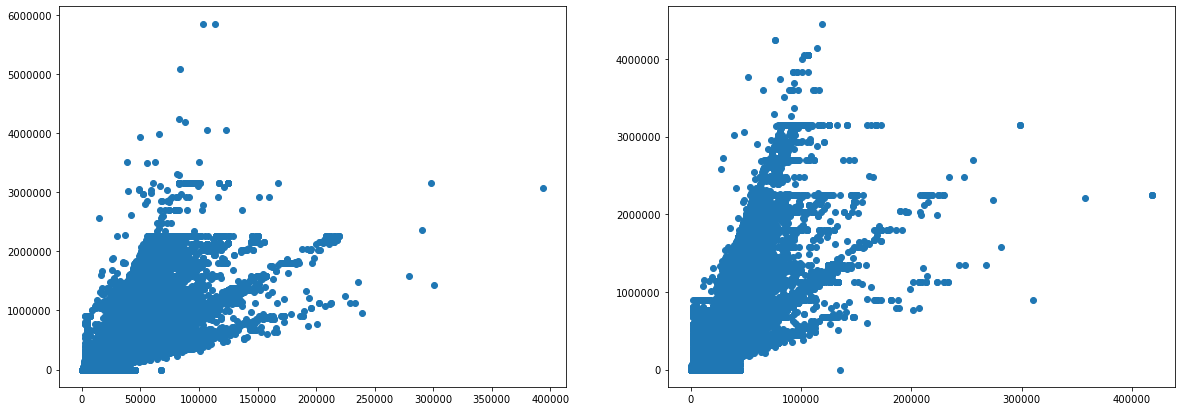

In [88]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
plt.scatter(prev_approved['PRE_AMT_ANNUITY'], prev_approved['AMT_APPLICATION'])

plt.subplot(1,2,2)
plt.scatter(prev_rejected['PRE_AMT_ANNUITY'], prev_rejected['AMT_APPLICATION'])
plt.show()

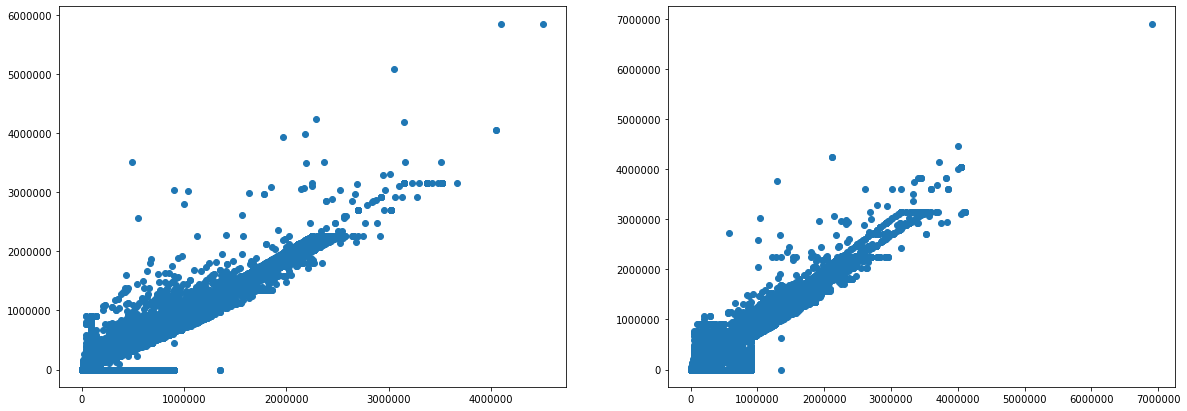

In [89]:
# Bivariate: Continuous-Continuous
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
plt.scatter(prev_approved['PRE_AMT_CREDIT'], prev_approved['AMT_APPLICATION'])

plt.subplot(1,2,2)
plt.scatter(prev_rejected['PRE_AMT_CREDIT'], prev_rejected['AMT_APPLICATION'])
plt.show()

<font style="color:blue">We did not find any relation into two Continous variables which directly impacts Aplication Rejection Rate</font>

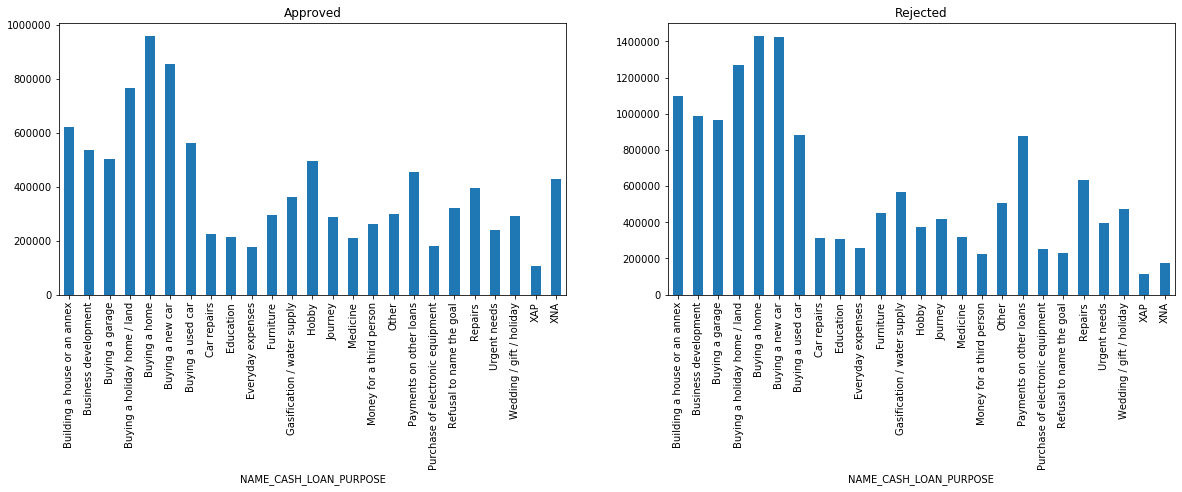

In [90]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
ax1 = prev_approved.groupby(['NAME_CASH_LOAN_PURPOSE'])["PRE_AMT_CREDIT"].mean().plot.bar()
ax1.title.set_text('Approved')
ax1.title.set_text('Approved')
plt.subplot(1,2,2)
ax2 = prev_rejected.groupby(['NAME_CASH_LOAN_PURPOSE'])["PRE_AMT_CREDIT"].mean().plot.bar()
ax2.title.set_text('Rejected')
plt.show()

### Multi Varient Analysis

1. <b> Client Region-1 </b> Customers are have more possibility to become defaulter
2. <b> Low & Medium </b> Income Range customers are Loyal compare to High

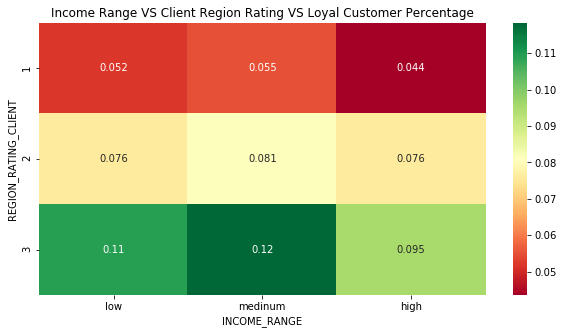

In [113]:
plt.figure(figsize=(10,5))
res_1 = pd.pivot_table(data = inp0, index="REGION_RATING_CLIENT", columns="INCOME_RANGE", values="TARGET", 
                     aggfunc={'TARGET': np.mean})
ax = sns.heatmap(res_1, annot=True, cmap="RdYlGn")
ax.title.set_text("Income Range VS Client Region Rating VS Loyal Customer Percentage")
plt.show()

###### Previous data explains that Bank has to bear more loss due to Above 60 age people

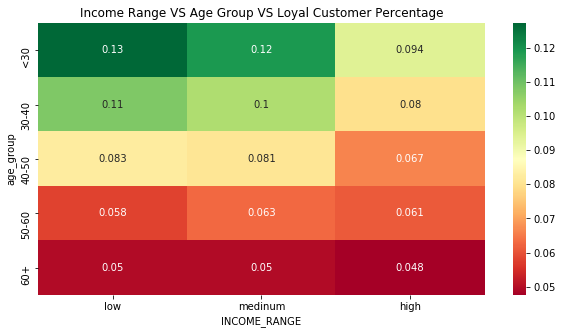

In [115]:
#AGE_GROUP VS INCOME_RANGE VS TARGET
plt.figure(figsize=(10,5))
res_1 = pd.pivot_table(data = inp0, index="age_group", columns="INCOME_RANGE", values="TARGET", 
                     aggfunc={'TARGET': np.mean})
ax = sns.heatmap(res_1, annot=True, cmap="RdYlGn")
ax.title.set_text("Income Range VS Age Group VS Loyal Customer Percentage")
plt.show()

###### Long Term Loans are Systematic way of getting Loan Paid

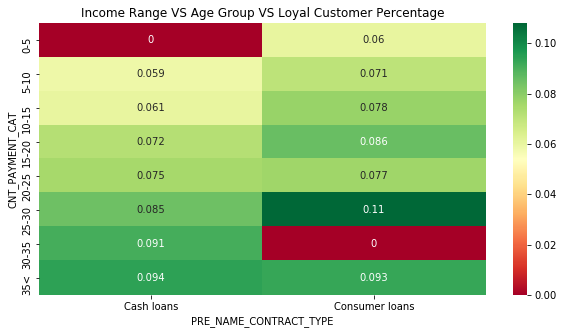

In [119]:
#PRE_NAME_CONTRACT_TYPE
plt.figure(figsize=(10,5))
res_1 = pd.pivot_table(data = prev_approved, index="CNT_PAYMENT_CAT", columns="PRE_NAME_CONTRACT_TYPE", values="TARGET", 
                     aggfunc={'TARGET': np.mean})
ax = sns.heatmap(res_1, annot=True, cmap="RdYlGn")
ax.title.set_text("Income Range VS Age Group VS Loyal Customer Percentage")
plt.show()